# Design of Experiments

###  Observation studies and Experiments

####  Observational study:
- Collect data in a way that does not directly interfere with how the data arise. 
- Only correlation can be inferred.

#### Experiment:
- Randomly assign subjects to various treatments
- Causation can be inferred

Relationships between using screens (mobile, tablet, laptop, etc) at bedtime and attention span.

- **Observational Study:** We sample 2 types of people from the population. Those who choose to use screens at bedtime and those who don't. Then we find the average attention span for the 2 groups of people and compare. Based on the observational study, even if we find a difference between the average attention span of these groups of people, we can't attribute this difference solely to using screens because there may be other variables that we didn't control for this study that could've contributed to the observed difference. For example, people who use screens at night might also be using screens for longer period during the day and their attention span might be affected by the daytime usage as well. 

- **Experiment:** We sample a group of people from the population and then we randomly assign these people into 2 groups: those who are asked to use screens at bedtime and those asked not to use them. The difference is that the decision to use or not use screens at bedtime is NOT left to the subject. Rather, it is imposed by the researcher. At the end, we compare the attention spans of the 2 groups. Such variables that might contribute to the outcome, called confounding variables, are most likely represented equally in the 2 groups due to random assignment. Therefore, if we find the difference between the 2 averages, we can indeed make a causal statement attributing this difference to bedtime screen usage. 


<img src="images/DOE_Study.JPG">

### Random sampling and random assignment

**Random sampling:** Occurs when the subjects are being selected for a study. If the subjects are selected randomly from the population, then the resulting sample is likely representative of the population and therefore the study's results can be generalizable to that population. 

** Random assignment:** Only occurs in experimental settings where subjects are being assigned to various treatments. Random assignments allow for causal conclusions. 

- **Random assignment + random sampling:** Causal and generalizable to the whole population. This is the ideal experiment but such studies are difficult to carry out, especially if the experimental units are humans, since it may be difficult to randomly sample people from the population and then impose treatments on them. 

- **Random assignment + no random sampling:** Causal but not generalizable. Experiments that rely on volunteers employ random assignment but not random sampling. These studies can be used to make causal conclusions but the conclusions but the conclusions can only be applied to the sample and the results cannot be generalized to the population. 

- **No random assignment + random sampling:** Not Causal but generalizable. A study that uses no random assignment but does use random sampling is your typical observational study. Results can only be used to make association statements but they can be generalized to the whole population.   

- **No random assignment + No random sampling:** Neither Causal nor generalizable. These studies can only be used to make non-causal association statements. This is NOT an ideal study. 

### Random sampling or random assignment:

One of the early studies linking smoking and lung cancer compared patients who are already hospitalized with lung cancer to similar patients without lung cancer (hospitalized for other reasons), and recorded whether each patient smoked. Then, proportions of smokers for patients with and without lung cancer were compared. 

**QUESTION:** Does this study employ random sampling and/or random assignment?

**ANSWER:** Neither random sampling nor random assignment. Random assignment is not employed because the conditions are not imposed on the patients by the people conducting the study. Random sampling is not employed because the study records the patients who are already hospitalized, so it wouldn't be appropriate to apply the findings back to the population as a whole. 


### Identify the scope of inference of study

Volunteers were recruited to participate in a study where they were asked to type 40 bits of trivia - for example, "an ostrich's eye is bigger than its brain" - into a computer. A randomly selected half of these subjects were told the information would be saved in the computer. The other half were told the items they typed would be erased. 

Then, the subjects were asked to remember these bits of trivia, and the number of bits of trivia each subject could correctly recall were recorded. It was found that the subjects were significantly more likely to remember information if they thought they would not be able to find it later. 

The results of the study **cannot** be generalized to all people and a causal link between believing information is stored and memory **can** be inferred based on these results. 

There is no random sampling since the subjects of the study were volunteers, so the results cannot be generalized to all people. However, due to random assignment, we are able to infer a causal link between the belief information is stored and the ability to recall that same information. 

### Simpson's Paradox

Often, when one mentions "a relationship between variables", we think of a relationship between just 2 variables (Explanatory variable X and Response variable Y). However, truly understanding the relationship between 2 variables might require considering other potentially related variables as well.  If we don't we might find ourselves in a Simpson's Paradox. 

Labelling variables as explanatory and response does not guarantee the relationship between the two is actually causal, even if there is an association identified. We use these labels only to keep track of which variable we suspect affects the other. 

We could study the relationship between 3 explanatory variables and a single response variable. This is often a more realistic scenario since most real world relationships are multivariable. 

For example, if we're interested in the relationship between calories consumed daily and heart health, we would probably also want to consider information on variables like age and fitness level of the person as well. **Not considering an important variable when studying a relationship can result in what we call a Simpson's Paradox, which illustrate the effect the ommission of an explanatory variable can on the measure of association between another explanatory variable and the response variable. **. 

In other words, the inclusion of a 3rd variable in the analysis can change the apparent relationship between the other 2 variables. 


In [1]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.4.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
ucb_admit <- read.csv('datasets/UCB_ADMIT.csv')
cols <- c("Admit", "Gender", "Dept")
colnames(ucb_admit) <- cols
head(ucb_admit)

Admit,Gender,Dept
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A
Admitted,Male,A


In [3]:
glimpse(ucb_admit)

Observations: 4,526
Variables: 3
$ Admit  <fct> Admitted, Admitted, Admitted, Admitted, Admitted, Admitted, ...
$ Gender <fct> Male, Male, Male, Male, Male, Male, Male, Male, Male, Male, ...
$ Dept   <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, ...


### Number of males and females admitted

In [4]:
ucb_admission_counts <- count(ucb_admit, Gender, Admit)
ucb_admission_counts

Gender,Admit,n
Female,Admitted,557
Female,Rejected,1278
Male,Admitted,1198
Male,Rejected,1493


### Proportion of males admitted overall

Next we'll calculate the percentage of males and percentage of females admitted, by creating a new variable, called prop (short for proportion) based off of the counts calculated in the previous exercise and using the mutate() from the dplyr package.

Proportions for each row of the data frame we created in the previous exercise can be calculated as n / sum(n). Note that since the data are grouped by gender, sum(n) will be calculated for males and females separately.

In [5]:
ucb_admission_counts %>%
    group_by(Gender) %>%
    mutate(prop = n / sum(n)) %>%
    filter(Admit == "Admitted")

Gender,Admit,n,prop
Female,Admitted,557,0.3035422
Male,Admitted,1198,0.4451877


It looks like 44% of males were admitted versus only 30% of females. BUT there's more to this story. 

### Proportion of males admitted for each department

Finally we'll make a table similar to the one we constructed earlier, except we'll first group the data by department. The goal is to compare the proportions of male admitted students across departments.

Proportions for each row of the data frame we create can be calculated as n / sum(n). Note that since the data are grouped by department and gender, sum(n) will be calculated for males and females separately for each department.

In [6]:
ucb_admission_counts <- ucb_admit %>%
    group_by(Dept, Gender, Admit) %>%
    count()

ucb_admission_counts

Dept,Gender,Admit,n
A,Female,Admitted,89
A,Female,Rejected,19
A,Male,Admitted,512
A,Male,Rejected,313
B,Female,Admitted,17
B,Female,Rejected,8
B,Male,Admitted,353
B,Male,Rejected,207
C,Female,Admitted,202
C,Female,Rejected,391


In [7]:
ucb_admission_counts  %>%
  group_by(Dept, Gender) %>%
  mutate(prop = n/sum(n))

Dept,Gender,Admit,n,prop
A,Female,Admitted,89,0.82407407
A,Female,Rejected,19,0.17592593
A,Male,Admitted,512,0.62060606
A,Male,Rejected,313,0.37939394
B,Female,Admitted,17,0.68000000
B,Female,Rejected,8,0.32000000
B,Male,Admitted,353,0.63035714
B,Male,Rejected,207,0.36964286
C,Female,Admitted,202,0.34064081
C,Female,Rejected,391,0.65935919


### Gapminder dataset

In [8]:
library(gapminder)

Warning message:
"package 'gapminder' was built under R version 3.4.4"

In [9]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [10]:
glimpse(gapminder)

Observations: 1,704
Variables: 6
$ country   <fct> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgha...
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asi...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


### Sampling strategies


Why do we sample in the first place? Why not try to collect data from the entire population of interest? You could try to take a census but it isn't easy. First, taking a census requires a lot more resources than collecting data from a sample of the population. Second, certain individuals in your population might be hard to locate or collect data from. If these individuals that are missed in the census are different from those in the rest of the population, the census data will be biased. 

For example, in the US census, illegal immigrants are often not recorded properly since they tend to be reluctant to fill out census forms with the concern that this information could be shared with immigrantion. However, these individuals might have characteristics different from the rest of the population and hence, not getting information from them might result in unreliable data from geographical regions with high concentrations of illegal immigrants. Lastly, populations are constantly changing. Even if you do have the required resources and manage to collect data from everyone in the population, your population will be different tomorrow and so the hard work required to collect such data may not pay off.

### Sample is natural

If you think about it, sampling is actually quite natural. Think about something you are cooking. We taste or in other words examine a small part of what we're cooking to get an idea about the dish as a whole. Afterall, we would never eat a whole pot of soup just to check its taste. When you taste a spoonful of soup and decide the spoonful you tasted isn't salty enough, what you're doing is simply explanatory analysis for the sample at hand. If you then generalize and conclude that your entire soup needs salt, that's making an inference. For your inference to be valid, the spoonful you tasted (your sample), needs to be representative of the entire pot (your population). If your spoonful comes only from the surface and the salt is collected at the bottom, what you tasted is probably not going to be representative of the whole pot. On the other hand, if you first stir the soup thoroughly before you taste, your spoonful will more likely be representative of the whole pot. 

Sampling data is a bit different than sampling soup though. Let's introduce a few commonly used sampling methods: 

* Simple random sampling
* Stratified sampling
* Cluster sampling
* Multistage sampling

### Simple random sampling
We randomly select cases from the population, such that each case is equally likely to be selected. This is similar to randomly drawing names from a hat. 

### Stratified sampling
We first divide the population into homogeneous groups called strata and then we randomly sample from within each stratum. For example, if we wanted to make sure that people from low, medium, and high socioeconomic status are equally represented in a study, we would first divide our population into 3 groups as such and then sample from within each group. 

### Cluster sampling
In cluster sampling, we divide the population into clusters, randomly sample a few clusters, and then sample all observations within these clusters. The clusters, unlike strata in stratified sampling, are heterogeneous within themselves and each cluster is similar to the others, such that we can get away with sampling from just a few of the clusters. 

### Multistage sampling
Multistage sampling adds another steps to cluster sampling. Just like in cluster sampling, we divide the population into clusters, randomly sample a few clusters, and then we randomly sample observations from within those clusters. 

...

Cluster and multistage sampling are often used from economical reasons. One might divide a city into geographic regions that are on average similar to each other and then sample randomly from a few randomly picked regions in order to avoid travelling to all regions. 

### Examples

### Sampling strategies, determine which...

A consulting company is planning a pilot study on marketing in Boston. They identify the zip codes that make up the greater Boston area, then sample 50 randomly selected addresses from each zip code and mail a coupon to these addresses. They then track whether the coupon was used in the following month.

What sampling strategy has this company used?

**Stratified sampling**

### Sampling strategies, choose worst...

A school district has requested a survey be conducted on the socioeconomic status of their students. Their budget only allows them to conduct the survey in some of the schools, hence they need to first sample a few schools.

Students living in this district generally attend a school in their neighborhood. The district is broken into many distinct and unique neighborhoods, some including large single-family homes and others with only low-income housing.

Which approach would likely be the least effective for selecting the schools where the survey will be conducted?

** Cluster sampling, where each cluster is a neighborhood. This sampling strategy would be a bad idea because each neighborhood has a unique socioeconomic status. A good study would collect information about every neighborhood **

### Sampling in R

In [11]:
library(openintro)
library(dplyr)

Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following objects are masked from 'package:datasets':

    cars, trees



In [12]:
# load county data
data(county)

In [13]:
head(county)

name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
Autauga County,Alabama,43671,54571,6.068095,10.6,77.5,7.2,24568,53255
Baldwin County,Alabama,140415,182265,6.139862,12.2,76.7,22.6,26469,50147
Barbour County,Alabama,29038,27457,8.752158,25.0,68.0,11.1,15875,33219
Bibb County,Alabama,20826,22915,7.122016,12.6,82.9,6.6,19918,41770
Blount County,Alabama,51024,57322,5.130910,13.4,82.0,3.7,21070,45549
Bullock County,Alabama,11714,10914,9.973062,25.3,76.9,9.9,20289,31602


In [14]:
summary(county)

                name           state         pop2000           pop2010       
 Washington County:  30   Texas   : 254   Min.   :     67   Min.   :     82  
 Jefferson County :  25   Georgia : 159   1st Qu.:  11210   1st Qu.:  11104  
 Franklin County  :  24   Virginia: 134   Median :  24608   Median :  25857  
 Jackson County   :  23   Kentucky: 120   Mean   :  89623   Mean   :  98233  
 Lincoln County   :  23   Missouri: 115   3rd Qu.:  61766   3rd Qu.:  66699  
 Madison County   :  19   Kansas  : 105   Max.   :9519338   Max.   :9818605  
 (Other)          :2999   (Other) :2256   NA's   :3                          
   fed_spend          poverty     homeownership     multiunit    
 Min.   :  0.000   Min.   : 0.0   Min.   : 0.00   Min.   : 0.00  
 1st Qu.:  6.964   1st Qu.:11.0   1st Qu.:69.50   1st Qu.: 6.10  
 Median :  8.669   Median :14.7   Median :74.60   Median : 9.70  
 Mean   :  9.991   Mean   :15.5   Mean   :73.26   Mean   :12.33  
 3rd Qu.: 10.857   3rd Qu.:19.0   3rd Qu.:78.4

In [15]:
glimpse(county)

Observations: 3,143
Variables: 10
$ name          <fct> Autauga County, Baldwin County, Barbour County, Bibb ...
$ state         <fct> Alabama, Alabama, Alabama, Alabama, Alabama, Alabama,...
$ pop2000       <dbl> 43671, 140415, 29038, 20826, 51024, 11714, 21399, 112...
$ pop2010       <dbl> 54571, 182265, 27457, 22915, 57322, 10914, 20947, 118...
$ fed_spend     <dbl> 6.068095, 6.139862, 8.752158, 7.122016, 5.130910, 9.9...
$ poverty       <dbl> 10.6, 12.2, 25.0, 12.6, 13.4, 25.3, 25.0, 19.5, 20.3,...
$ homeownership <dbl> 77.5, 76.7, 68.0, 82.9, 82.0, 76.9, 69.0, 70.7, 71.4,...
$ multiunit     <dbl> 7.2, 22.6, 11.1, 6.6, 3.7, 9.9, 13.7, 14.3, 8.7, 4.3,...
$ income        <dbl> 24568, 26469, 15875, 19918, 21070, 20289, 16916, 2057...
$ med_income    <dbl> 53255, 50147, 33219, 41770, 45549, 31602, 30659, 3840...


In [16]:
# since DC is not a state by definition, we're going to remove it

county_noDC <- county %>%
    filter(state != "District of Columbia") %>%
    droplevels()

# we'll drop levels for good measure
# dso the District of Columbia is removed completely
# from our dataframe. 

head(county_noDC)

name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
Autauga County,Alabama,43671,54571,6.068095,10.6,77.5,7.2,24568,53255
Baldwin County,Alabama,140415,182265,6.139862,12.2,76.7,22.6,26469,50147
Barbour County,Alabama,29038,27457,8.752158,25.0,68.0,11.1,15875,33219
Bibb County,Alabama,20826,22915,7.122016,12.6,82.9,6.6,19918,41770
Blount County,Alabama,51024,57322,5.130910,13.4,82.0,3.7,21070,45549
Bullock County,Alabama,11714,10914,9.973062,25.3,76.9,9.9,20289,31602


Suppose our limited resources require that we collect data from only 150 of the over 3000 counties in the United States. One option is to take a simple random sample.

In [17]:
# simple random sample of 150 counties

county_srs <- county_noDC %>%
    sample_n(size = 150)

glimpse(county_srs)

Observations: 150
Variables: 10
$ name          <fct> Jackson County, Saline County, Colquitt County, Bingh...
$ state         <fct> Alabama, Arkansas, Georgia, Idaho, Pennsylvania, Nebr...
$ pop2000       <dbl> 53926, 83529, 42053, 41735, 72392, 8333, 13771, 16230...
$ pop2010       <dbl> 53227, 107118, 45498, 45607, 68941, 7547, 12765, 1748...
$ fed_spend     <dbl> 12.483439, 3.448123, 7.764297, 6.004013, 10.128052, 1...
$ poverty       <dbl> 17.5, 9.9, 23.4, 14.7, 11.7, 12.5, 17.9, 12.3, 10.5, ...
$ homeownership <dbl> 76.6, 77.7, 61.7, 79.9, 76.4, 80.1, 71.4, 69.3, 82.7,...
$ multiunit     <dbl> 5.8, 7.8, 11.7, 9.6, 10.2, 6.6, 11.5, 48.5, 7.0, 0.0,...
$ income        <dbl> 18905, 24584, 17362, 18633, 21828, 21976, 19020, 2863...
$ med_income    <dbl> 36312, 51502, 32902, 44128, 42752, 42665, 36654, 5169...


However, if we wanted to obtain equal number of counties from each state that is 3 counties per state, a simple random sample won't ensure that. We can confirm this by counting the number of counties per state...

In [18]:
county_srs %>% 
    group_by(state) %>%
    count()

state,n
Alabama,5
Alaska,1
Arizona,2
Arkansas,5
California,3
Colorado,2
Connecticut,1
Florida,3
Georgia,11
Idaho,3


If we instead want to sample 3 counties per state to make up our sample of 150 counties, we should use stratified sampling.

In [19]:
# stratified sample of 150 counties
# each state is a stratum

county_str <- county_noDC %>%
    group_by(state) %>%
    sample_n(size = 3)

glimpse(county_str)

Observations: 150
Variables: 10
$ name          <fct> Crenshaw County, Montgomery County, Marshall County, ...
$ state         <fct> Alabama, Alabama, Alabama, Alaska, Alaska, Alaska, Ar...
$ pop2000       <dbl> 13665, 223510, 82231, 6174, 9196, 7385, 19715, 8547, ...
$ pop2010       <dbl> 13906, 229363, 93019, 7029, 9492, 9430, 20489, 8437, ...
$ fed_spend     <dbl> 9.650295, 22.173354, 7.679141, 20.188362, 25.942478, ...
$ poverty       <dbl> 17.7, 18.9, 19.9, 10.0, 24.6, 11.8, 20.3, 13.5, 15.7,...
$ homeownership <dbl> 67.8, 63.2, 72.5, 65.2, 56.2, 48.3, 75.4, 46.9, 69.0,...
$ multiunit     <dbl> 9.2, 22.4, 9.3, 17.3, 17.4, 24.9, 3.6, 6.1, 12.2, 12....
$ income        <dbl> 19793, 24622, 19875, 27657, 20549, 22109, 21165, 2128...
$ med_income    <dbl> 35140, 43725, 37661, 59596, 53899, 68517, 32147, 4869...


In [20]:
county_str %>% 
    group_by(state) %>%
    count()

state,n
Alabama,3
Alaska,3
Arizona,3
Arkansas,3
California,3
Colorado,3
Connecticut,3
Delaware,3
Florida,3
Georgia,3


Simple random sampling would result in diferent amounts of data being sampled from each state. Stratified sampling ensured an equal number of states from each region. 

### Principles of experimental design

* Control: To control means to compare the treatment of interest to a control group. 

* Randomize: To randomize means to randomly assingly subjects to treatments. 

* Replicate: To replicate means to collect a sufficiently large sample within a study or to replicate the entire study. 

* Block: The goal of blocking is to account for potential effect of known or suspected confounding variables. We do this by first grouping subjects into blocks based on these variables and then randomizing them within each block to treatment groups. 


...

Let's discuss block a bit more

### Design a study (with blocking)

We would like to design an experiment to investigate whether students learn the R language in a traditional lecture based course or using an interactive online learning platform. 

Two courses that teach the exact same material are designed and the only difference between these courses is the method of delivery: traditional lecture or interactive online. 

We sample a group of students for our study that we will randomly assign to these 2 courses. But before we do so, we need to consider any potential confounding variables. It is suspected that previous programming experience might have an effect on how students learn in these two settings and we know that some of the students in our study have previous programming experience and some don't. Therefore, we decide to block for having previous programming experience. 

To do so, we divide our sample into two: those with programming experience and those without. Then we randomly assign individuals from each block into the 2 courses, ensuring that those with and without programming experience are equally represented in the 2 treatment groups. In this experiment, the explanatory variable is the course type lecture vs interactive online and the variable that we're blocking for is the previous programming experience. 

This way, if we find a difference in mastery of the R language between students in the 2 groups, we will be able to attribute it to the course-type and can be assured that the difference isn't due to previous programming experience since both those with and without such experience were equally represented in the 2 treatment groups. 

<img src="images/DOE_Blocking.JPG">

### Identifying components of a study

A researcher designs a study to test the effect of light and noise levels on exam performance of students. The researcher also believes that light and noise levels might have different effects on males and females, so she wants to make sure both genders are represented equally under different conditions.

**Answer:** There are 2 explanatory variables (light and noise), 1 blocking variable (gender), and 1 repsonse varaible (exam performance). 

### Experimental design terminology

**Explanatory variables** are conditions you can impose on the experimental units, while **blocking variables** are characteristics that the experimental units come with that you would like to control for.

### Connect blocking and stratifying

In random sampling, we use stratifying to control for a variable. In random assignment, we use blocking to achieve the same goal.

# Case study: Beauty in the classroom

Many college courses conclude by giving students the opportunity to annoymously evalaute both the course and the instructor. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because the measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor.

The data that we will be working with, which includes information on course evaluations as well as students' scoring of professors' physical attractiveness, was collected as part of a study conducted at the University of Texas - Austin. Let's analyze these data with the eventual goal of investigating whether instructors who are viewed to be better looking receive higher instructional ratings. 

In [21]:
load('datasets/evals.RData')

In [22]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,multi credit,5,7,6,2,4,6,5,not formal,color
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,...,multi credit,4,4,2,2,3,3,3,not formal,color


In [23]:
summary(evals)

     score                 rank            ethnicity      gender   
 Min.   :2.300   teaching    :102   minority    : 64   female:195  
 1st Qu.:3.800   tenure track:108   not minority:399   male  :268  
 Median :4.300   tenured     :253                                  
 Mean   :4.175                                                     
 3rd Qu.:4.600                                                     
 Max.   :5.000                                                     
        language        age        cls_perc_eval     cls_did_eval   
 english    :435   Min.   :29.00   Min.   : 10.42   Min.   :  5.00  
 non-english: 28   1st Qu.:42.00   1st Qu.: 62.70   1st Qu.: 15.00  
                   Median :48.00   Median : 76.92   Median : 23.00  
                   Mean   :48.37   Mean   : 74.43   Mean   : 36.62  
                   3rd Qu.:57.00   3rd Qu.: 87.25   3rd Qu.: 40.00  
                   Max.   :73.00   Max.   :100.00   Max.   :380.00  
  cls_students    cls_level      cls_prof

In [24]:
glimpse(evals)

Observations: 463
Variables: 21
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

#### This is an observational study

### Sampling / experimental attributes

The data from this study were gathered by randomly sampling classes.

### Variables in the data

* score: The average evaluation score of the professor for a given course. Scores range between 1 and 5 and 5 being an excellent evaluation. 

* rank: We are also given whether the professor is a teaching faculty, tenure track faculty, or tenured faculty.

* minority: Whether they are from a minority group or not

* gender: Whether they are male or female

* language: Whether the language of instruction at the university where they received their education was English or not. 

* Age: The age of the professor

We also have attribute about the classes themselves. 

* cls_perc_eval: Percent of students who completed the evaluations
* cls_did_eval: Number of students who completed the evals
* cls_students: Total number of students in the class
* cls_level: Level of the course
* cls_profs: Whether a single professor or multiple professors taught it
* cls_credits: Whether the course was a single credit or multi-credit course.

The attractiveness score of the professors in the sample were determined by six students who provided photos of the professors to rate. These students were comprised of 1 female who is lower level, that is first year or sophomore (indicated with f1lower), 2 female students who are upper level (indicated with f1upper and f2upper), one male student who is lower lowerl (m1lower) and 2 male students who are upper level (m1upper and m2upper). 1 indicates a low attractiveness score and a 10 indicates a high attractiveness score. 

* bty_avg: Average attractiveness score
* pic_outfit: Whether the professor was wearing a formal outfit in the photo
* pic_color: Whether the picture was black/white or in color. 

### Identify variable types

It's always useful to start your exploration of a dataset by identifying variable types. The results from this exercise will help you design appropriate visualizations and calculate useful summary statistics later in your analysis.

In [25]:
glimpse(evals)

Observations: 463
Variables: 21
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

**Categorical variables:** "rank", "ethnicity", "gender", "language",           "cls_level", "cls_profs", "cls_credits", "pic_outfit", "pic_color"

### Recode a variable
The cls_students variable in evals tells you the number of students in the class. Suppose instead of the exact number of students, you're interested in whether the class is

* "small" (18 students or fewer),
* "midsize" (19 - 59 students), or
* "large" (60 students or more).

Recode the cls_students variable into a new variable, cls_type, using case_when(). This new variable should have three levels as described above. Save the resulting data frame (with the new variable) as evals.

In [26]:
# Recode cls_students as cls_type
evals <- evals %>%
  mutate(cls_type = case_when(
    cls_students <= 18 ~ "small",
    cls_students >= 19 & cls_students <= 59  ~ "midsize",
    cls_students >= 60 ~ "large"
    )
  )

In [27]:
glimpse(evals)

Observations: 463
Variables: 22
$ score         <dbl> 4.7, 4.1, 3.9, 4.8, 4.6, 4.3, 2.8, 4.1, 3.4, 4.5, 3.8...
$ rank          <fct> tenure track, tenure track, tenure track, tenure trac...
$ ethnicity     <fct> minority, minority, minority, minority, not minority,...
$ gender        <fct> female, female, female, female, male, male, male, mal...
$ language      <fct> english, english, english, english, english, english,...
$ age           <int> 36, 36, 36, 36, 59, 59, 59, 51, 51, 40, 40, 40, 40, 4...
$ cls_perc_eval <dbl> 55.81395, 68.80000, 60.80000, 62.60163, 85.00000, 87....
$ cls_did_eval  <int> 24, 86, 76, 77, 17, 35, 39, 55, 111, 40, 24, 24, 17, ...
$ cls_students  <int> 43, 125, 125, 123, 20, 40, 44, 55, 195, 46, 27, 25, 2...
$ cls_level     <fct> upper, upper, upper, upper, upper, upper, upper, uppe...
$ cls_profs     <fct> single, single, single, single, multiple, multiple, m...
$ cls_credits   <fct> multi credit, multi credit, multi credit, multi credi...
$ bty_f1lower   <int

In [28]:
head(evals)

score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color,cls_type
4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,5,7,6,2,4,6,5,not formal,color,midsize
4.1,tenure track,minority,female,english,36,68.80000,86,125,upper,...,5,7,6,2,4,6,5,not formal,color,large
3.9,tenure track,minority,female,english,36,60.80000,76,125,upper,...,5,7,6,2,4,6,5,not formal,color,large
4.8,tenure track,minority,female,english,36,62.60163,77,123,upper,...,5,7,6,2,4,6,5,not formal,color,large
4.6,tenured,not minority,male,english,59,85.00000,17,20,upper,...,4,4,2,2,3,3,3,not formal,color,midsize
4.3,tenured,not minority,male,english,59,87.50000,35,40,upper,...,4,4,2,2,3,3,3,not formal,color,midsize


### Create a scatterplot
The bty_avg variable shows the average beauty rating of the professor by the six students who were asked to rate the attractiveness of these faculty. The score variable shows the average professor evaluation score, with 1 being very unsatisfactory and 5 being excellent.

In [29]:
library(ggplot2)


Attaching package: 'ggplot2'

The following object is masked from 'package:openintro':

    diamonds



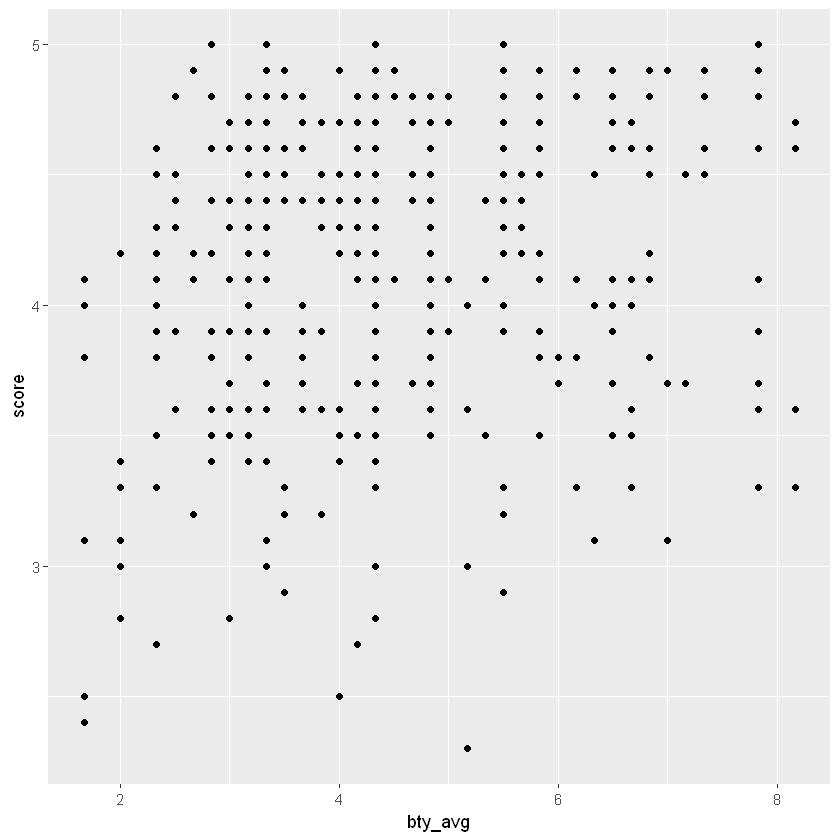

In [30]:
ggplot(evals, aes(x = bty_avg, y = score)) + geom_point()

### Create a scatterplot, with an added layer
Suppose you are interested in evaluating how the relationship between a professor's attractiveness and their evaluation score varies across different class types (small, midsize, and large).

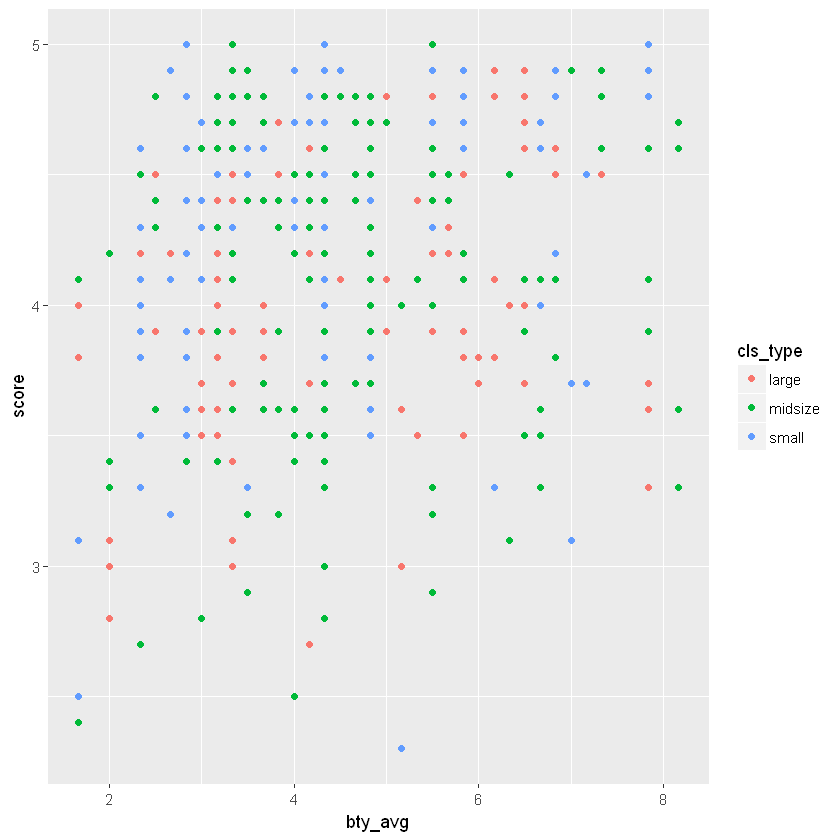

In [31]:
ggplot(evals, aes(x = bty_avg, y = score, color = cls_type)) +
    geom_point()

# Experimental Design Basics

An experiemnt starts with a question. The experiment involves collecting data with the question in mind and will include analyzing the data to seek an answer. 

The 3 level steps of an experiment are:

**1) Planning:** You start with your hypothesis - your question or even a series of series. What are you hoping to answer? What is the populatino of interest? What will your dependent variable be, the outcome, which hopefully can be measured to answer the question? What are your independent or explanatory variables - the variables you think may explain the dependent variable? 

**2) Design:** Design questions may naturally follow planning questions. Choosing a design might entail knowing you want to study different variables and the possible interaction effects of those variables, so you choose a factorial design. Then, if you dependent variable will be a yes/no answer, you know you're going to be dealing with some kind of logistic regression when you get to analysis. 

**3) Analysis**

### Three key components of an experiment

- Randomization
- Replication
- Blocking

All of these are done to access the variability across the study population. This means we're looking to explain the variation in an outcome by the different explanatory variables. In order to keep bias low, we need to randomize, create a replicable experiment, and sometimes block. 

Say we want to test who can score the most free throws in 5 minutes. We select as one group the HS basketball team and for the other, an english class. This is an incredibly biased experiment right out the gate. Any conclusions we draw will be based on our poor selection of groups and lack of randomization. 



### Randomization

Randomization is a key tenet of any experiment. Evenly distributes any variability in outcome due to outside factors across treatment groups. One example of randomization is double-blind medical trials, where neither the patient nor the researcher knows if the patient is recieving the treatment or not. The patient is randomized by a 3rd party into one of the two groups. 

### Replication

Replication is the idea that we need to repeat our experiment in order to assess what variability looks like. We certainly can't analyze data if we test a drug's efficacy on only one patient. Maybe it worked for them but how do we know if it will also work for other people? How can we properly generalize those results (we cant!). Our experiment must be designed to be easily replicable to get a wide range of outcomes. 

### Blocking

Block is a technique to help control variability by making treatment groups more alike. Inside of groups, differences will be minimal. A classic example is to test the effects of a drug on male and female patients, blocking by sex, to account for treatment variability, in this case, known differences in the drug reactions of amle and female bodies. 

In [32]:
data(ToothGrowth)

In [33]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [34]:
mean(ToothGrowth$len)
median(ToothGrowth$len)

[1] 18.81333

[1] 19.25

Use t.test() to test if the len variable is not equal to 18 micrometers.

In [35]:
# Perform a two-sided t-test
t.test(x = ToothGrowth$len, 
       alternative = "two.sided", 
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.4135
alternative hypothesis: true mean is not equal to 18
95 percent confidence interval:
 16.83731 20.78936
sample estimates:
mean of x 
 18.81333 


It appears given the high p-value that we can conclude that we fail to reject the null hypothesis that the mean of len is not equal to 18, meaning we have evidence to believe it is around 18 micrometers.

### Randomization

Recall that randomization of subjects in an experiment helps spread any natural variability between subjects evenly across groups.

n the experiment that yielded the ToothGrowth dataset, guinea pigs were randomized to receive Vitamin C either through orange juice or ascorbic acid, indicated in the dataset by the supp variable. It's natural to wonder if there is a difference in tooth length by supplement type - a question that a t-test can also answer!

**Syntax: **
t.test(outcome ~ explanatory_variable, data = dataset)

Conduct the proper test to determine if there is a difference in tooth length based on supplement type

In [36]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [37]:
library("broom")

In [38]:
# Perform a t-test
# h0 = no difference (difference is 0)
# h1 = there is a difference

(ToothGrowth_ttest <- t.test(len ~ supp, data = ToothGrowth))


	Welch Two Sample t-test

data:  len by supp
t = 1.9153, df = 55.309, p-value = 0.06063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1710156  7.5710156
sample estimates:
mean in group OJ mean in group VC 
        20.66333         16.96333 


In [39]:
# Tidy the t-test model object
tidy(ToothGrowth_ttest)

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
3.7,20.66333,16.96333,1.915268,0.06063451,55.30943,-0.1710156,7.571016,Welch Two Sample t-test,two.sided


It seems as though there is a difference in length between supplement types.

### Replication
Recall that replication means you need to repeat an experiment with an adequate number of subjects (sample size), usually to achieve an acceptable statistical power.

In [40]:
# Group by supp, dose, then examine 
# how many observations in ToothGrowth 
# there are by those groups

ToothGrowth %>% 
    group_by(supp, dose) %>% 
    summarise(n=n())

supp,dose,n
OJ,0.5,10
OJ,1.0,10
OJ,2.0,10
VC,0.5,10
VC,1.0,10
VC,2.0,10


The researchers seem to have tested each combination of supp and dose on 10 subjects each, which is low, but adequate for our experiments.

### Blocking
Though this is not true, suppose the supplement type is is actually a nuisance factor we'd like to control for by blocking, and we're actually interested in the effect of the dose of Vitamin C on guinea pig tooth growth.

We'll use the aov() function to examine this effect. aov() creates a linear regression model by calling lm() and examining results with anova() all in one function call. To use aov(), we'll still need functional notation, as with the randomization exercise, but this time the formula should be **len ~ dose + supp** to indicate we've blocked by supplement type.

In [41]:
ToothGrowth$dose <- as.factor(ToothGrowth$dose)

Make a boxplot to examine if the tooth length is different by dose. dose has been converted to a factor variable for you.

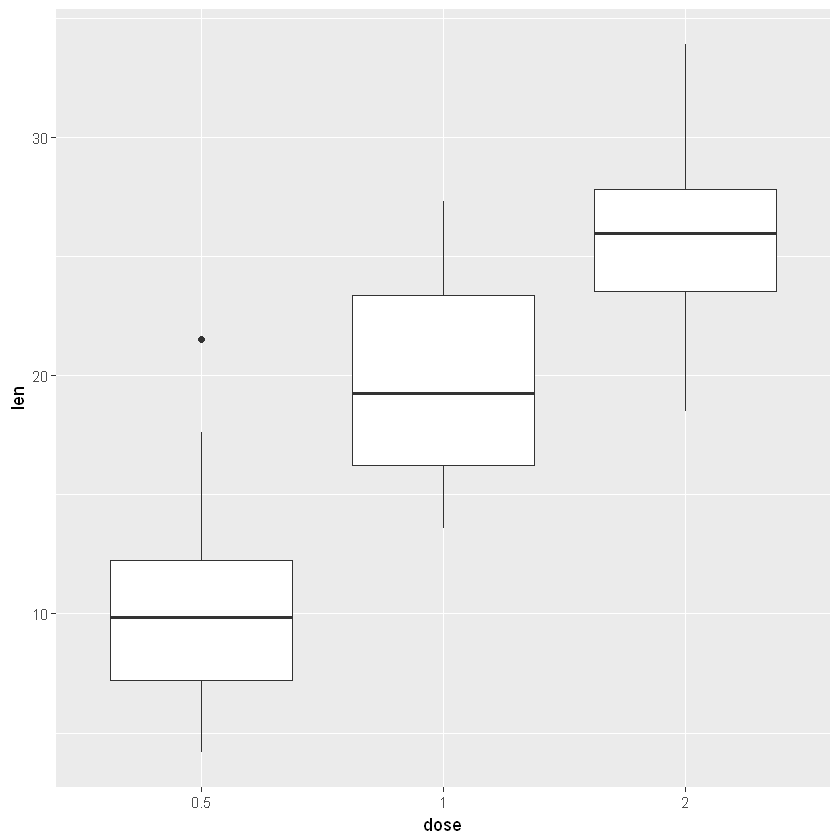

In [42]:
# Create a boxplot with geom_boxplot()
ggplot(ToothGrowth, aes(x = dose, y = len)) + 
    geom_boxplot()

Use aov() to detect the effect of dose and supp on len

In [43]:
# Create the ToothGrowth_aov model object
(ToothGrowth_aov <- aov(len ~ dose + supp, 
                            data = ToothGrowth))

Call:
   aov(formula = len ~ dose + supp, data = ToothGrowth)

Terms:
                    dose     supp Residuals
Sum of Squares  2426.434  205.350   820.425
Deg. of Freedom        2        1        56

Residual standard error: 3.82759
Estimated effects may be unbalanced

In [44]:
# Examine the model object with summary()
summary(ToothGrowth_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
dose         2 2426.4  1213.2   82.81  < 2e-16 ***
supp         1  205.4   205.4   14.02 0.000429 ***
Residuals   56  820.4    14.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [45]:
tidy(ToothGrowth_aov)

term,df,sumsq,meansq,statistic,p.value
dose,2,2426.434,1213.21717,82.81093,1.871163e-17
supp,1,205.350,205.35000,14.01664,4.292793e-04
Residuals,56,820.425,14.65045,NA,NA


That's our first Randomized Complete Block Design (RCBD) experiment!

## Hypothesis Testing

A very important concept in experimental design is the formation and testing of a hypothesis or your central research question. For the tooth growth dataset that we worked on previously - the hypothesis concerned the effect of different doses and administration methods of Vitamin C on the length of tooth growth in the guinea pig. 

There are really 2 hypotheses that are grouped together - the null and the alternative hypothesis. 

**Null Hypothesis: **
- There is no change
- No difference between groups
- The mean, median, or observation = a number

For example, in the tooth growth experiment, the null hypothesis is: "There is no effect of Vitamin C dosage or administration type on guinea pig tooth growth". 

There's some nuance involved in the alternative hypothesis and its construction will help lead you to the correct test. 

**Alternative Hypothesis: **
- There is a chance
- Difference between groups
- Mean, median, or observation is >, <, or != to a number

If you're testing if the mean is only less than or greater than a value, it's a one-sided test. If you're testing that it's not equal to some number, that's a two-sided test. The one/two sided rule applies both to if you're testing one or two groups' means. Recall when we conducted a two-sided test to determine if the mean length of tooth growth was not equal to 18. The p-value was 0.4135, so at the 0.05 significance level, we fail to reject the null hypothesis. We have no strong evidence to suggest the mean is not equal to 18. 

Directly related to hypothesis testing is the idea of power. Power is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. One golden rule in statistics is to aim to have 80% power in your experiments, which you'll need an adequate sample size to achieve. 

Effect size, in the context of power analysis, is a standardized measure of the difference you're trying to detect - calculated as the difference between group means divided by the pooled standard deviation of the data. It's easier to detect a larger difference in means than a smaller one. 

Sample size is important in experiments. In general, as sample size increases, power increases. You've collected more information so you're more capable of examining your hypothesis. 

You need 2 of these 3 pieces to calculate the other: if you have a given power and effect size, you can generally calculate sample size. 

In [50]:
library(pwr)

In [52]:
pwr.anova.test(k=3, # k = the number of groups in the comparison
                  n=20, # n = the number of observations per group
                  f=0.2, # f = effect size
                  sig.level=0.05, # significance level
                  power=NULL) # one of the params must be NULL so it can calculate the missing param. 


     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 20
              f = 0.2
      sig.level = 0.05
          power = 0.2521043

NOTE: n is number in each group


A power of 0.25 is not great - we probably can't detect that small of an effect size with so few people in each group. 

### One sided vs. Two sided tests

We tested to see if the mean of the guinea pigs' teeth in ToothGrowth was not equal to 18 micrometers. That was an example of a two sided test: it looked to see if the mean of len is some other number on either side of 18.

We can also conduct a one sided test, explicitly checking to see if the mean is less than or greater than 18. Whether to use a one or two sided test usually follows from your research question. Want to know if an intervention causes longer tooth growth? One sided, greater than. Want to know if a drug causes the test group to lose more weight? One sided, less than. Simply want to know if there's a difference in test scores between two groups of students? Two sided test.

In [58]:
mean(ToothGrowth$len)

[1] 18.81333

In [56]:
# Test to see if the mean of the length variable of ToothGrowth is less than 18.

# H0 = mean is greater than or equal to 18
# H1= mean is less than 18

t.test(x = ToothGrowth$len,
       alternative = "less",
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.7933
alternative hypothesis: true mean is less than 18
95 percent confidence interval:
     -Inf 20.46358
sample estimates:
mean of x 
 18.81333 


In [57]:
# Test to see if the mean of the length variable of ToothGrowth is greater than 18

# H0 = mean is less than or equal to 18
# H1= mean is greater than 18

t.test(x = ToothGrowth$len,
       alternative = "greater",
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.2067
alternative hypothesis: true mean is greater than 18
95 percent confidence interval:
 17.16309      Inf
sample estimates:
mean of x 
 18.81333 


 It turns out the mean of len is actually very close to 18, so neither of these tests tells us much about the mean of tooth length.

In [60]:
# H0 = mean is equal to 18
# H1= mean is not equal to 18

t.test(x = ToothGrowth$len,
       alternative = "two.sided",
       mu = 18)


	One Sample t-test

data:  ToothGrowth$len
t = 0.82361, df = 59, p-value = 0.4135
alternative hypothesis: true mean is not equal to 18
95 percent confidence interval:
 16.83731 20.78936
sample estimates:
mean of x 
 18.81333 


### Power & Sample Size Calculations

One key part of designing an experiment is knowing the required sample size you'll need to be able to test your hypothesis. The pwr package provides a handy function, pwr.t.test(), which will calculate that for you, however you do need to know your desired significance level (often 0.05), if the test is one or two sided, if the data is from one sample, two samples, or paired, the effect size, and the power. Some of this information will be given to you or can be reasoned from the design.

A power or sample size calculation is usually different each time you conduct one, and the details of the calculation strongly depend on what kind of experiment you're designing and what your end goals are.

In [61]:
# Calculate power using an effect size of 0.35, a sample size of 100 in each group, and a significance level of 0.10.

pwr.t.test(n = 100, 
           d = 0.35,
           sig.level = 0.10,
           type = "two.sample", 
           alternative = "two.sided",
           power = NULL)


     Two-sample t test power calculation 

              n = 100
              d = 0.35
      sig.level = 0.1
          power = 0.7943532
    alternative = two.sided

NOTE: n is number in *each* group


In [62]:
# Calculate the sample size needed with an effect size of 0.25, a significance level of 0.05, and a power of 0.8.

pwr.t.test(n = NULL, 
           d = 0.25, 
           sig.level = 0.05, 
           type = "one.sample", alternative = "greater", 
           power = 0.80)


     One-sample t test power calculation 

              n = 100.2877
              d = 0.25
      sig.level = 0.05
          power = 0.8
    alternative = greater


The pwr package includes functions for calculating power and sample size for a variety of different tests, including ANOVA and linear models.

# Basic experiments

Let's explore 3 key concepts for experimental design

- ANOVA Test for 3+ groups
- Single and multiple factor experiments
- Importance of completely randomized design

So far, we've done some basic comparative experiments where we examine the difference in mean between 2 groups or 2 time periods of the same group using a T-Test. What do we do if we have more than 2 groups to compare? The answer is an ANOVA Test, which stands for Analysis of Variance. It allows us to compare the means of 3 or more groups. But there is a bit of a catch. We'll only know if one of the means is different from the others but not which means specifically. The test is still informative and can be implemented in R in a few different ways. 

In the first, you build a model object with the lm() or glm() functions and then call ANOVA on that model object. The second implementation, the aov() function, calls lm() internally and both builds the model object for you and conducts the anova test. 

A single factor experiment is like the model example from before - an experiment with one possible explanatory variable. 

In this example, model 1 is a linear regression model with some outcome variable (Y) and an explanatory variable (x) - a single factor. Ideally, a single factor experiement also has a completely randomized design which means there's some structure in your experiement. If applicacable, subjects are randomly assign to the treatment or control group. A classic textbook example of a single factor completely randomized design is testing cotton fabric strength. You can test the tensile strength of different cotton fabric in a random order and all that differs is the percent cotton in the fabric. 

A mutliple factor experiement expands on the single factor experiments and includes multiple explanatory factor variables that may be influencing the outcome variable. This might be an experiment that takes into account not just how much vitamin C a guinea pig was given but also the delivery method - a callback to our toothgrowth example. 

We'll be working with the Lending Club data. The outcome that we'll be most interested in is the amount funded. We'll test different explanatory variables that may influence the amount.

In [34]:
library("dplyr")
library("ggplot2")
library("broom")

In [1]:
lendingclub <- read.csv("datasets/lendclub.csv")

In [2]:
head(lendingclub)

member_id,loan_amnt,funded_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,grade
55096114,11000,11000,36 months,12.69,10+ years,RENT,51000,Not Verified,Current,debt_consolidation,C
1555332,10000,10000,36 months,6.62,10+ years,MORTGAGE,40000,Verified,Fully Paid,debt_consolidation,A
1009151,13000,13000,60 months,10.99,3 years,MORTGAGE,78204,Not Verified,Fully Paid,home_improvement,B
69524202,5000,5000,36 months,12.05,10+ years,MORTGAGE,51000,Not Verified,Current,home_improvement,C
72128084,18000,18000,36 months,5.32,10+ years,MORTGAGE,96000,Not Verified,Current,credit_card,A
53906707,14000,14000,60 months,16.99,3 years,MORTGAGE,47000,Not Verified,Current,home_improvement,D


In [6]:
glimpse(lendingclub)

Observations: 1,500
Variables: 12
$ member_id           <int> 55096114, 1555332, 1009151, 69524202, 72128084,...
$ loan_amnt           <int> 11000, 10000, 13000, 5000, 18000, 14000, 8000, ...
$ funded_amnt         <int> 11000, 10000, 13000, 5000, 18000, 14000, 8000, ...
$ term                <fct> 36 months, 36 months, 60 months, 36 months, 36 ...
$ int_rate            <dbl> 12.69, 6.62, 10.99, 12.05, 5.32, 16.99, 13.11, ...
$ emp_length          <fct> 10+ years, 10+ years, 3 years, 10+ years, 10+ y...
$ home_ownership      <fct> RENT, MORTGAGE, MORTGAGE, MORTGAGE, MORTGAGE, M...
$ annual_inc          <dbl> 51000, 40000, 78204, 51000, 96000, 47000, 40000...
$ verification_status <fct> Not Verified, Verified, Not Verified, Not Verif...
$ loan_status         <fct> Current, Fully Paid, Fully Paid, Current, Curre...
$ purpose             <fct> debt_consolidation, debt_consolidation, home_im...
$ grade               <fct> C, A, B, C, A, D, C, A, D, B, C, B, E, C, A, C,...


In [7]:
# Find median loan_amnt, mean int_rate, and mean annual_inc with summarise()
lendingclub %>% 
    summarise(median(loan_amnt), mean(int_rate), mean(annual_inc))

median(loan_amnt),mean(int_rate),mean(annual_inc)
13000,13.31472,75736.03


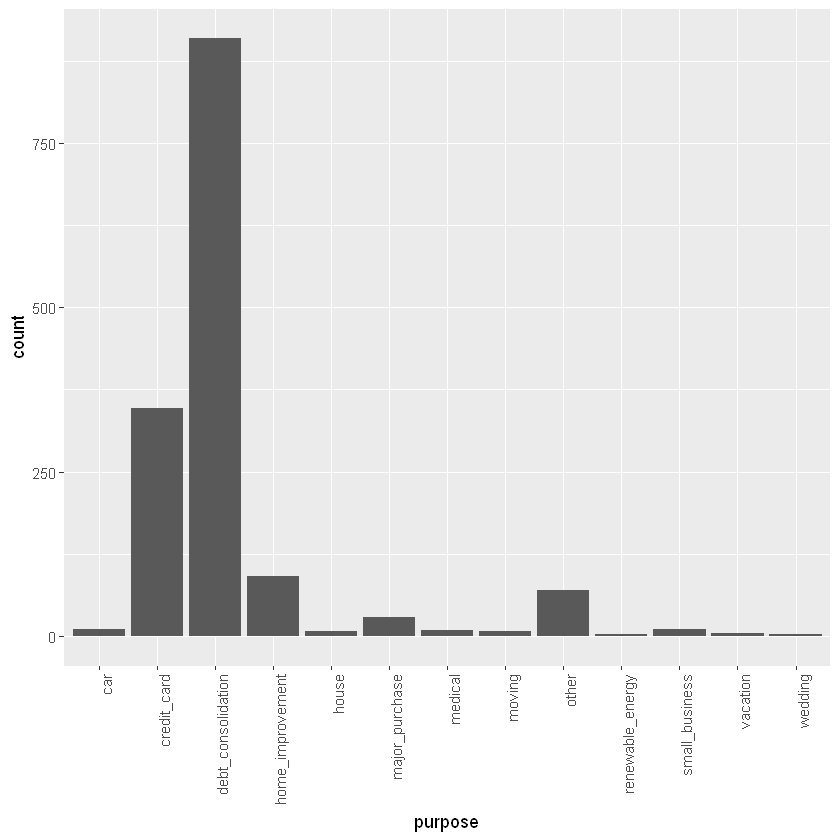

In [16]:
ggplot(data=lendingclub, aes(x = purpose)) + geom_bar() + 
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=1))

In [11]:
# Use recode() to create the new purpose_recode variable
lendingclub$purpose_recode <- lendingclub$purpose %>% recode( 
        "credit_card" = "debt_related", "debt_consolidation" = "debt_related", "medical" = "debt_related",
         "car" = "big_purchase", "major_purchase" = "big_purchase", "vacation" = "big_purchase",
         "moving" = "life_change", "small_business" = "life_change", "wedding" = "life_change",
         "house" = "home_related", "home_improvement" = "home_related")

In [12]:
head(lendingclub$purpose)

[1] debt_consolidation debt_consolidation home_improvement   home_improvement  
[5] credit_card        home_improvement  
13 Levels: car credit_card debt_consolidation home_improvement ... wedding

In [13]:
head(lendingclub$purpose_recode)

[1] debt_related debt_related home_related home_related debt_related
[6] home_related
6 Levels: big_purchase debt_related home_related life_change ... renewable_energy

### How does loan purpose affect amount funded?
We pared the purpose variable down to a more reasonable 5 categories and called it purpose_recode. As a data analyst or data scientist at Lending Club, we might want to design an experiment where we examine how the loan purpose influences the amount funded (the money actually issued to the applicant.)

Remember that for an ANOVA test, the null hypothesis will be that all of the mean funded amounts are equal across the levels of purpose_recode. The alternative hypothesis is that at least one level of purpose_recode has a different mean. We will not be sure which, however, without some post hoc analysis.

* H0 = All the mean funded amounts are equal across the levels of purpose_recode. 
* H1 = At least one level of purpose_recode has a different mean. 

In [18]:
# Build a linear regression model, stored as purpose_recode_model
purpose_recode_model <- lm(funded_amnt ~ purpose_recode, data = lendingclub)

In [19]:
# Look at results of purpose_recode_model
summary(purpose_recode_model)


Call:
lm(formula = funded_amnt ~ purpose_recode, data = lendingclub)

Residuals:
   Min     1Q Median     3Q    Max 
-14472  -6251  -1322   4678  25761 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      9888.1     1248.9   7.917 4.69e-15 ***
purpose_recodedebt_related       5433.5     1270.5   4.277 2.02e-05 ***
purpose_recodehome_related       4845.0     1501.0   3.228  0.00127 ** 
purpose_recodelife_change        4095.3     2197.2   1.864  0.06254 .  
purpose_recodeother              -649.3     1598.3  -0.406  0.68461    
purpose_recoderenewable_energy  -1796.4     4943.3  -0.363  0.71636    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8284 on 1494 degrees of freedom
Multiple R-squared:  0.03473,	Adjusted R-squared:  0.0315 
F-statistic: 10.75 on 5 and 1494 DF,  p-value: 3.598e-10


In [20]:
# Get anova results and save as purpose_recode_anova
purpose_recode_anova <- anova(purpose_recode_model)

In [23]:
# Look at the class of purpose_recode_anova
summary(purpose_recode_anova)

       Df             Sum Sq             Mean Sq             F value     
 Min.   :   5.0   Min.   :3.689e+09   Min.   : 68629950   Min.   :10.75  
 1st Qu.: 377.2   1st Qu.:2.840e+10   1st Qu.:235911630   1st Qu.:10.75  
 Median : 749.5   Median :5.311e+10   Median :403193309   Median :10.75  
 Mean   : 749.5   Mean   :5.311e+10   Mean   :403193309   Mean   :10.75  
 3rd Qu.:1121.8   3rd Qu.:7.782e+10   3rd Qu.:570474988   3rd Qu.:10.75  
 Max.   :1494.0   Max.   :1.025e+11   Max.   :737756668   Max.   :10.75  
                                                          NA's   :1      
     Pr(>F) 
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  
 NA's   :1  

In [24]:
purpose_recode_anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
purpose_recode,5,3688783338,737756668,10.74978,3.597784e-10
Residuals,1494,102533145566,68629950,NA,NA


The ANOVA results are saved as a data frame, not a model object, which is nice in case you need to access results later. Loans aren't issued in a vacuum, however, and it's likely that more than just purpose influences the amount funded.

### Which loan purpose mean is different?
Before we examine other factors besides purpose_recode that might influence the amount of loan funded, let's examine which means of purpose_recode are different.

The result of the ANOVA was statistically significant with a very low p-value. This means we can reject the null hypothesis and accept the alternative hypothesis that at least one mean was different. But which one?

There are post hoc tests we can do to determine just that. Specifically, we should use Tukey's HSD (which stands for Honest Significant Difference...statistics is fun!) test with an object created with aov() (remember that this is the other function that conducts an ANOVA test, but also builds the linear model for you.)

In [25]:
# Use aov() to build purpose_recode_aov
purpose_recode_aov <- aov(funded_amnt ~ purpose_recode, data = lendingclub)

In [28]:
summary(purpose_recode_aov)

                 Df    Sum Sq   Mean Sq F value  Pr(>F)    
purpose_recode    5 3.689e+09 737756668   10.75 3.6e-10 ***
Residuals      1494 1.025e+11  68629950                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [31]:
# Conduct Tukey's HSD test to create tukey_output
tukey_output <- TukeyHSD(purpose_recode_aov, conf.level = 0.95)

In [35]:
# Tidy tukey_output to make sense of the results
tidy(tukey_output)

term,comparison,estimate,conf.low,conf.high,adj.p.value
purpose_recode,debt_related-big_purchase,5433.5497,1808.4015,9058.698,2.905254e-04
purpose_recode,home_related-big_purchase,4845.0126,562.0345,9127.991,1.606975e-02
purpose_recode,life_change-big_purchase,4095.2652,-2174.3728,10364.903,4.250779e-01
purpose_recode,other-big_purchase,-649.3001,-5209.7754,3911.175,9.985823e-01
purpose_recode,renewable_energy-big_purchase,-1796.4015,-15901.7471,12308.944,9.991732e-01
purpose_recode,home_related-debt_related,-588.5371,-3055.5905,1878.516,9.840871e-01
purpose_recode,life_change-debt_related,-1338.2845,-6539.3240,3862.755,9.776960e-01
purpose_recode,other-debt_related,-6082.8498,-9005.2437,-3160.456,5.321224e-08
purpose_recode,renewable_energy-debt_related,-7229.9512,-20893.8901,6433.988,6.580011e-01
purpose_recode,life_change-home_related,-749.7475,-6428.9211,4929.426,9.990158e-01
